In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r'Heart.csv')

In [5]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [6]:
data=data.drop(columns='Unnamed: 0')

In [7]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [11]:
data['Ca']=data['Ca'].fillna(data['Ca'].mean())
data['Thal']=data['Thal'].fillna(data['Thal'].mode()[0])

In [12]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [13]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.000000,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.000000,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.000000,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.000000,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.000000,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.000000,normal,Yes


Text(0, 0.5, 'Chol')

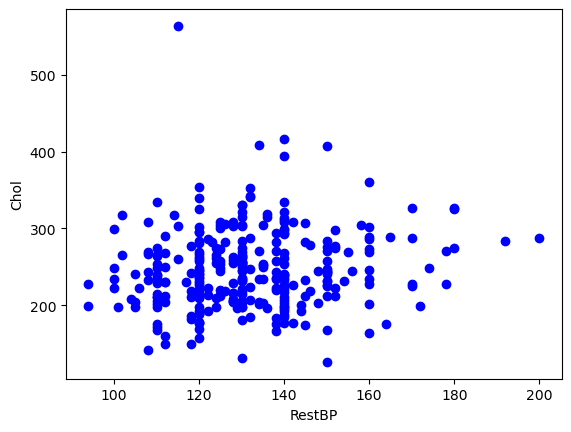

In [16]:
#Scatter plot
plt.scatter(data['RestBP'],data['Chol'],color='blue')
plt.xlabel('RestBP')
plt.ylabel('Chol')

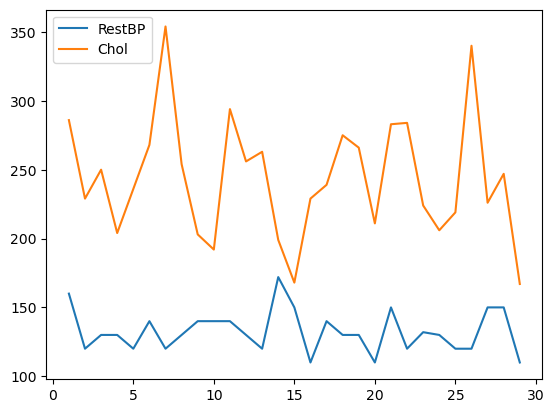

In [19]:
#line plot
restbp=data.iloc[1:30,3]
chol=data.iloc[1:30,4]
plt.plot(restbp,label='RestBP')
plt.plot(chol,label='Chol')
plt.legend()

<Axes: xlabel='Age', ylabel='Count'>

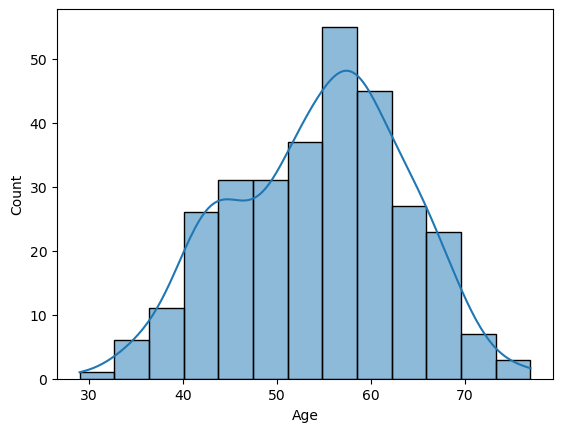

In [20]:
#histogram
sns.histplot(data=data,x='Age',kde=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


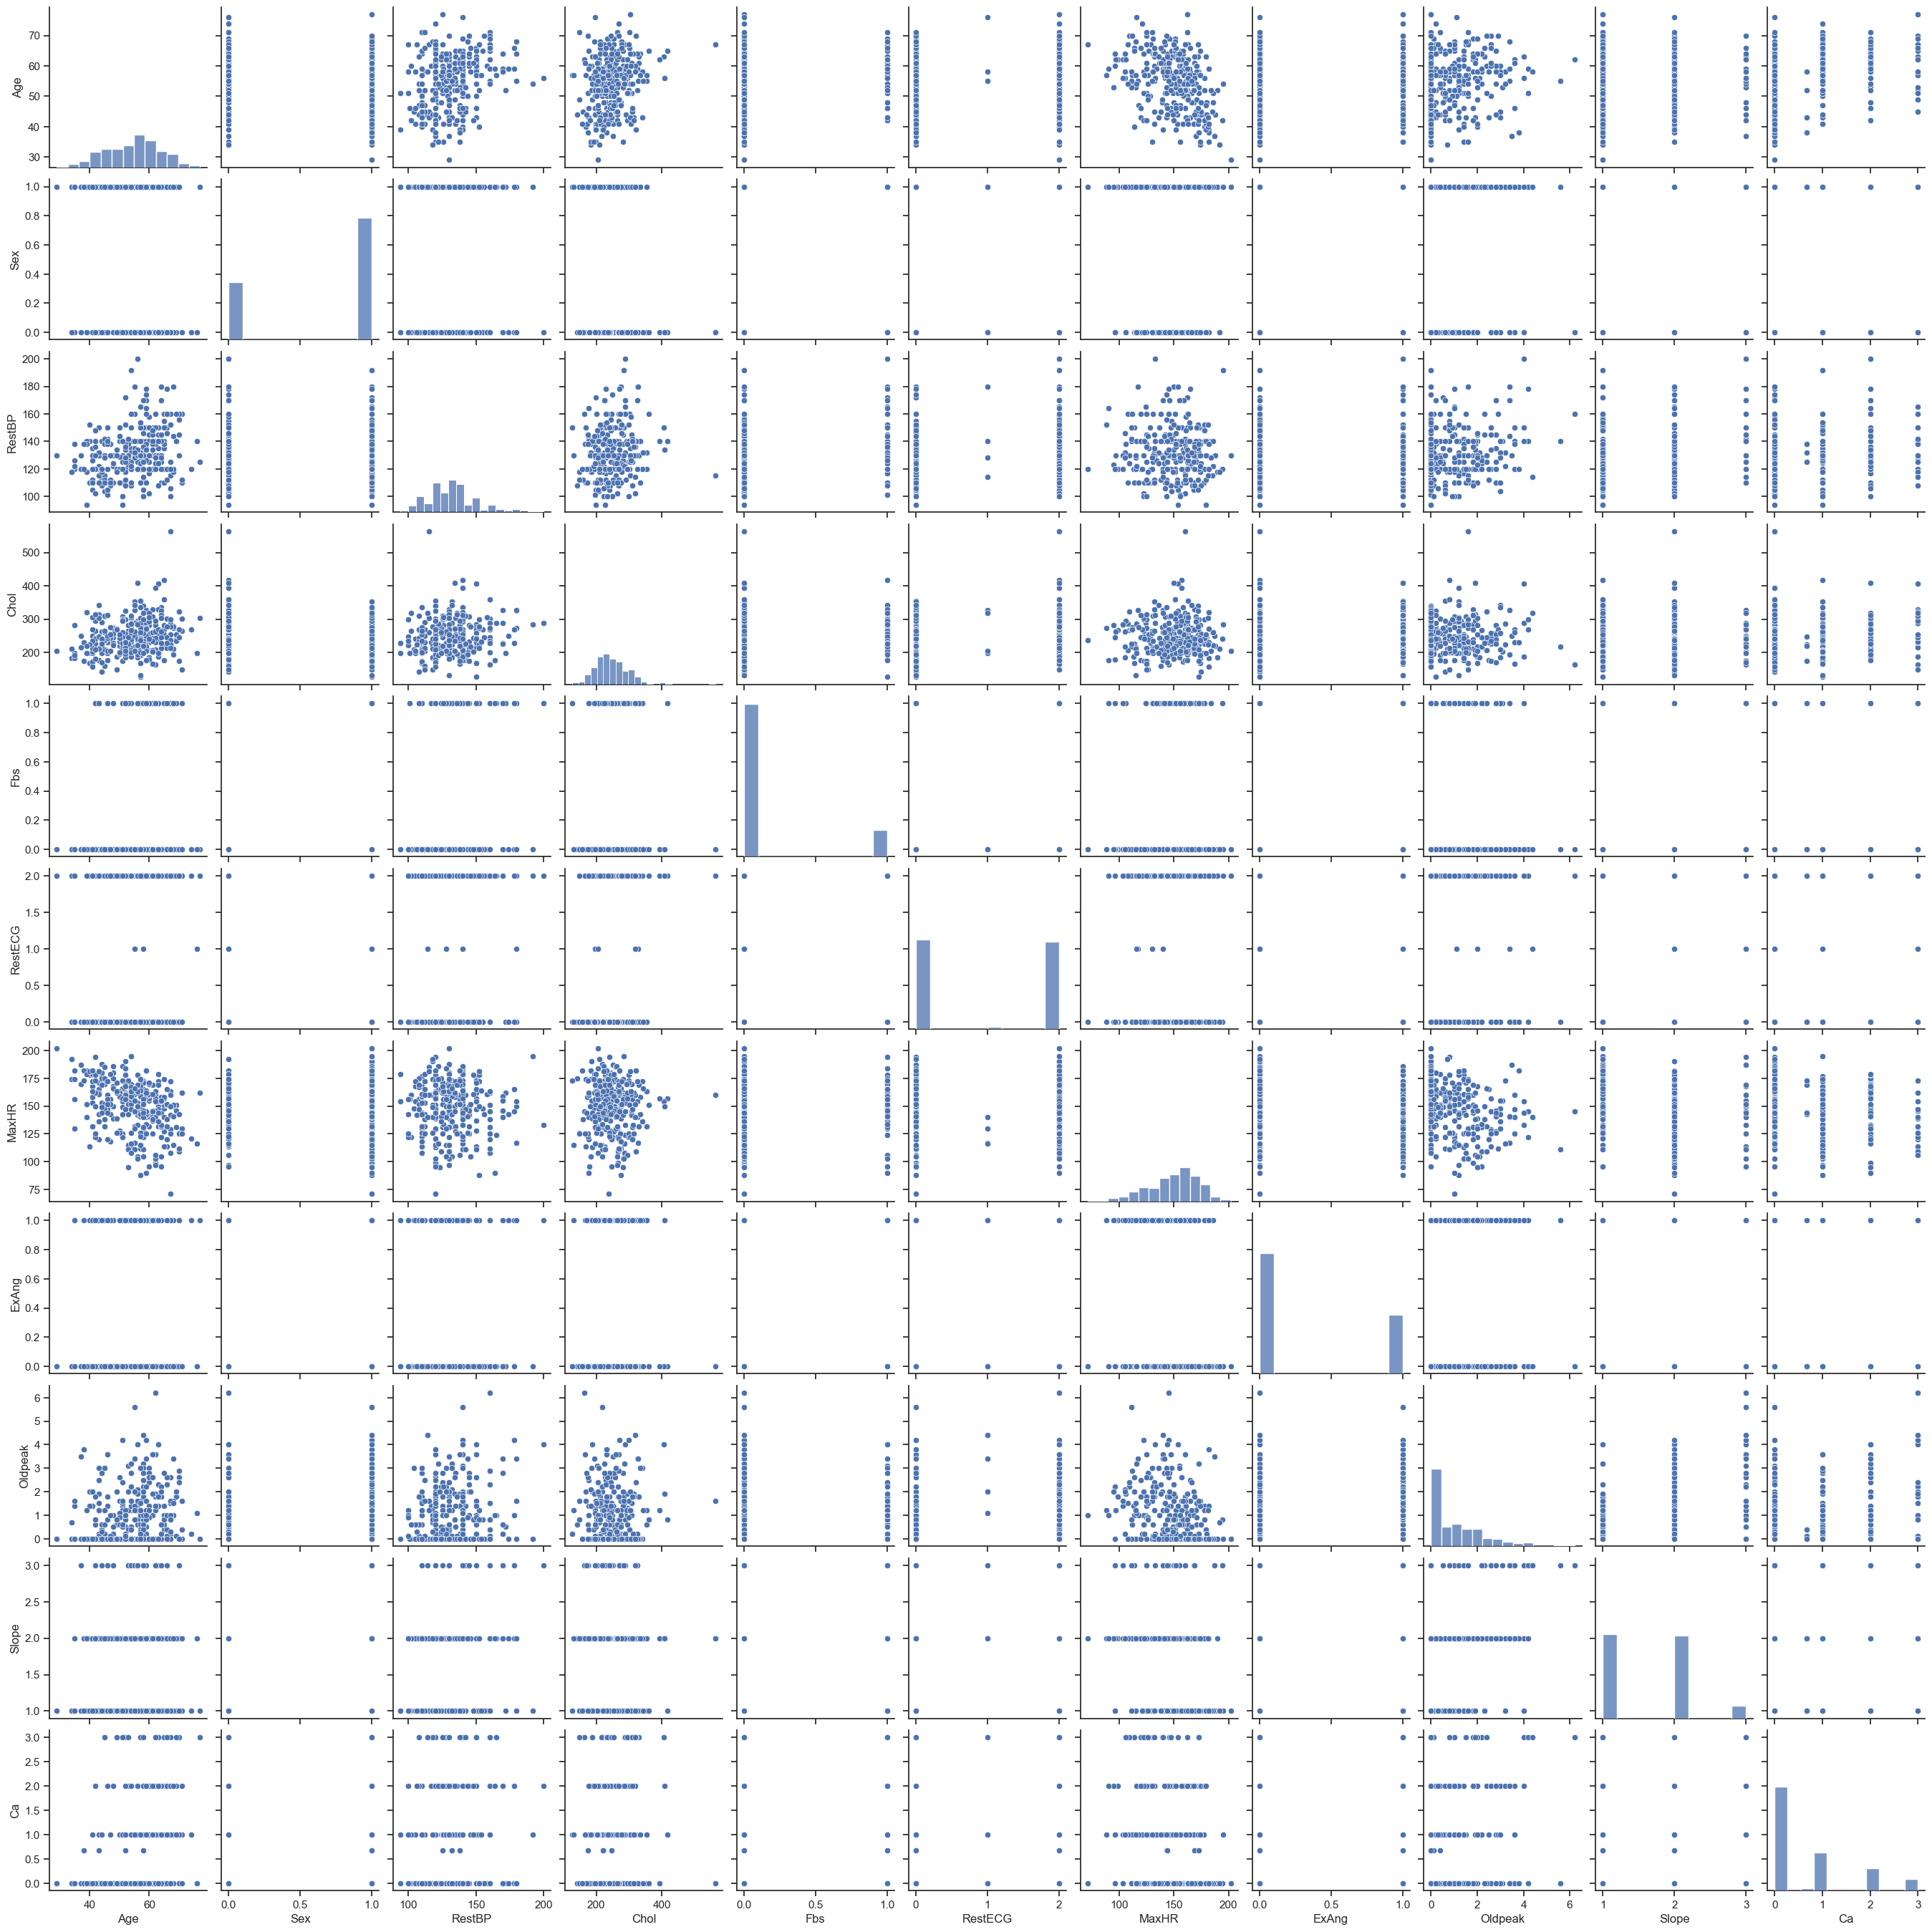

In [21]:
#pairplot
sns.set(style='ticks')
sns.pairplot(data)

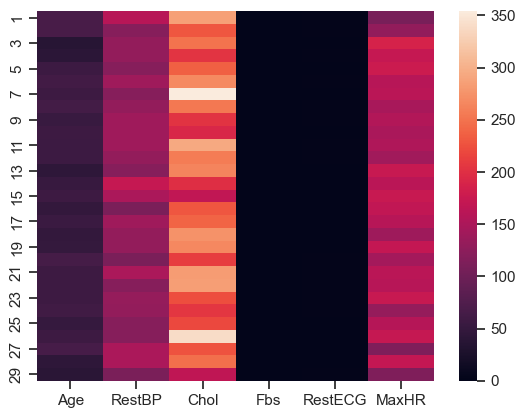

In [27]:
#heatmap
df=data[['Age','RestBP','Chol','Fbs','RestECG','MaxHR']].iloc[1:30]
ax=sns.heatmap(df)